# Joukowski Transformation

The Joukowski transformation is a conformal mapping used by mathematicians at the beginning of the 20th Century. It allows flow past a cylinder to be accurately transformed into flow past an aerofoil

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

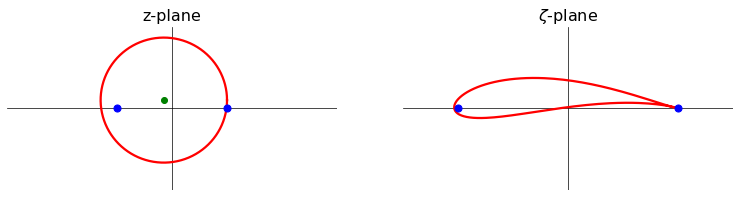

In [3]:
# Set-up
#=======================================
N = 200
x_s, x_e = -3, 3
y_s, y_e = -1.5, 1.5

# Define Functions
#=======================================

# Circle
def circle(xc, yc):
    t = np.linspace(0, 2*math.pi, N)

    x = r * np.cos(t)
    y = r * np.sin(t)
    
    z = (x+xc) + 1j * (y+yc)
    return z

# Transformation
def trans(zj, a):
    w = zj + a**2 / zj
    return w

# Parameters
#=======================================
a = 1
r = 1.15

x_centre, y_centre = -0.15, 0.15

# Function Calling
#=======================================
z = circle(x_centre, y_centre)
w = trans(z, a)

x, y = np.real(z), np.imag(z)
xx, yy = np.real(w), np.imag(w)

# PLOTS
#=======================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,3))

# Circle subplot
#=======================================
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('y', fontsize=16)
ax1.set_title("z-plane", fontsize=16)
ax1.set_xlim(x_s, x_e)
ax1.set_ylim(y_s, y_e)
ax1.axis('off')

ax1.axhline(y=0, linewidth=0.7, color='k', linestyle='-', zorder=1)
ax1.axvline(x=0, linewidth=0.7, color='k', linestyle='-', zorder=2)
ax1.plot(x, y, color='r', linewidth=2.25)
ax1.scatter(x_centre, y_centre, color='green', zorder=3)
ax1.scatter([-1*a, 1*a], [0, 0], color='b', s=50, zorder=4)

# Joukowski subplot
#=======================================
ax2.set_xlabel(r'$\alpha$', fontsize=16)
ax2.set_ylabel(r'$\beta$', fontsize=16)
ax2.set_title(r"$\zeta$-plane", fontsize=16)
ax2.set_xlim(x_s, x_e)
ax2.set_ylim(y_s, y_e)
ax2.axis('off')

ax2.axhline(y=0, linewidth=0.7, color='k', linestyle='-')
ax2.axvline(x=0, linewidth=0.7, color='k', linestyle='-')
ax2.plot(xx, yy, color='r', linewidth=2.25)
ax2.scatter([-2*a, 2*a], [0, 0], color='b', s=50, zorder=4)

## Flow Past a Cylinder with Angle of Attack

In [6]:
# Mesh Grid in Polar Coordinates
#=======================================
N = 200
R_start, R_end = 1.15, 5

t = np.linspace(0, 2*math.pi, N)
r = np.linspace(R_start, R_end, N)

R, T = np.meshgrid(r, t)

# Angle of Attack
#=======================================
def off_axis(aoa, xc, yc, R, T):
    x = R * np.cos(T)
    y = R * np.sin(T)
    
    g = (x+xc) * np.cos(aoa) + (y+yc) * np.sin(aoa)
    h = - (x+xc) * np.sin(aoa) + (y+yc) * np.cos(aoa)
    
    k = g + 1j * h
    return k

# Stream Function
#=======================================
def stream(U, mu, gam, R, T):
    psi = U * R * np.sin(T) - ( mu / (2*math.pi*R) ) * np.sin(T) - ( gam / (2*math.pi) ) * np.log(R)
    return psi

# Redline
#======================================
def redline(aoa, rad, xc, yc):    
    xx = rad * np.cos(t)
    yy = rad * np.sin(t)
    
    gg = (xx+xc) * np.cos(aoa) + (yy+yc) * np.sin(aoa)
    hh = - (xx+xc) * np.sin(aoa) + (yy+yc) * np.cos(aoa)
    
    zz = gg + 1j * hh
    return zz

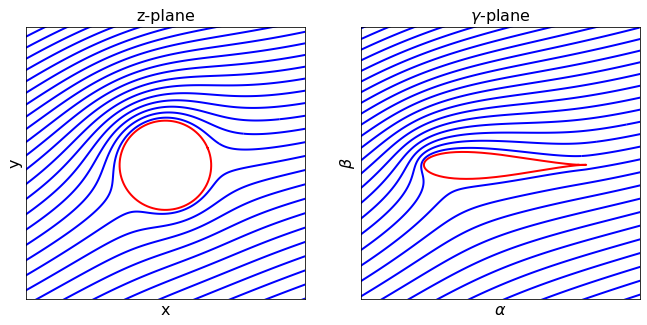

In [9]:
# Settings
#======================================
x_centre, y_centre = -0.15, 0.05

U_0 = 1
a = 1
mu = 8.3
gamma = -5

radius = math.sqrt( mu / (2 * math.pi * U_0) )

alpha = -(1/8) * math.pi

# Function Calling
#=======================================
k = off_axis(alpha, x_centre, y_centre, R, T)
X, Y = np.real(k), np.imag(k)

w = trans(k, a)
XX, YY = np.real(w), np.imag(w)

zz = redline(alpha, radius, x_centre, y_centre)
xx, yy = np.real(zz), np.imag(zz)

ww = trans(zz, a)
xxx, yyy = np.real(ww), np.imag(ww)

psi = stream(U_0, mu, gamma, R, T)

# Plot limits
#===========================================
x_s, x_e = x_centre - 3.5, x_centre + 3.5
y_s, y_e = y_centre - 3.5, y_centre + 3.5

# PLOTS
#===========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))


# Circle subplot
#===========================================
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('y', fontsize=16)
ax1.set_title("z-plane", fontsize=16)
ax1.set_xlim(x_s, x_e)
ax1.set_ylim(y_s, y_e)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.contour(X, Y, psi, 
            35, colors='blue', linewidths=2, linestyles='solid')
ax1.plot(xx, yy, color='red', linewidth=2)


# Aerofoil subplot
#===========================================
ax2.set_xlabel(r'$\alpha$', fontsize=16)
ax2.set_ylabel(r'$\beta$', fontsize=16)
ax2.set_title(r"$\gamma$-plane", fontsize=16)
ax2.set_xlim(x_s, x_e)
ax2.set_ylim(y_s, y_e)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.contour(XX, YY, psi, 
            35, colors='blue', linewidths=2, linestyles='solid')
ax2.plot(xxx, yyy, color='red', linewidth=2)

# Pressure Coefficients

In [17]:
# Cylinder Velocity Components
#=========================================================
def velocity_components(U, rad, gam, R, T):
    u = U * np.cos(T) * ( 1 - rad**2 / R**2 )
    v = - U * np.sin(T) * ( 1 + rad**2 / R**2 ) - ( gam / (2 * math.pi * R) )
    return u, v

def complex_velocity(uf, vf):
    dF_z = uf - 1j * vf
    return dF_z

def jt_diff(z, a):
    dw = 1 - (a**2 / z**2)
    return dw

def jt_velocity(df, dw):
    dF_w = df / dw
    return dF_w

# Function Calling
#=======================================
u, v = velocity_components(U_0, radius, 5, R, T)

dF_z = complex_velocity(u, v)

dw = jt_diff(k, a)

dF_w = jt_velocity(dF_z, dw)
uu, vv = np.real(dF_w), np.imag(dF_w)

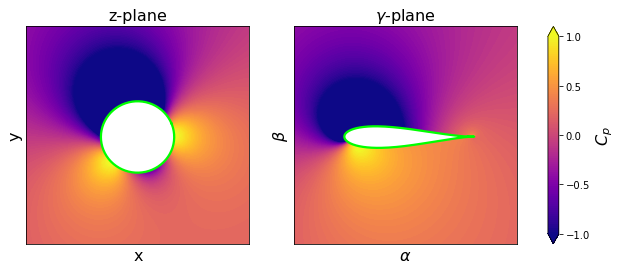

In [18]:
# Pressure coefficient
#===========================================
cp = 1.0 - (u**2 + v**2) / U_0**2
cp2 = 1.0 - (uu**2 + vv**2) / U_0**2


# Plot
#===========================================
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
plt.set_cmap('plasma')

# Circle subplot
#===========================================
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('y', fontsize=16)
ax1.set_title("z-plane", fontsize=16)
ax1.set_xlim(x_s, x_e)
ax1.set_ylim(y_s, y_e)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.contourf(X, Y, cp,
           levels=np.linspace(-1, 1, 100), extend='both')
ax1.plot(xx, yy, color='lime', linewidth=2.25)


# Aerofoil subplot
#===========================================
ax2.set_xlabel(r'$\alpha$', fontsize=16)
ax2.set_ylabel(r'$\beta$', fontsize=16)
ax2.set_title(r"$\gamma$-plane", fontsize=16)
ax2.set_xlim(x_s, x_e)
ax2.set_ylim(y_s, y_e)
ax2.set_xticks([])
ax2.set_yticks([])

cf = ax2.contourf(XX, YY, cp2,
           levels=np.linspace(-1, 1, 100), extend='both')
ax2.plot(xxx, yyy, color='lime', linewidth=2.25)


# Plot colorbar
#============================================
cbar = plt.colorbar(cf, ax=[ax1, ax2])
cbar.set_label(r'$C_p$', fontsize=16)
cbar.set_ticks([-1.0, -0.5, 0.0, 0.5, 1.0])